In [104]:
from scipy.optimize import linprog
from pulp import *
import time
import numpy as np
print("Scipy")
start = time.time()
c =[-10,-14]
A =[[2,4],[1,8],[7,4]]
b =[120,280,240]
x0_bounds = (0,None)
x1_bounds = (0,None)
res = linprog(c,A_ub =A, b_ub=b, bounds=[x0_bounds, x1_bounds])
print(res)
stop = time.time()
print("Time :")
print(stop - start)
print("\nPulp")
start1 = time.time()
x1 = pulp.LpVariable("x1", lowBound =0)
x2 = pulp.LpVariable("x2", lowBound =0)
problem = pulp.LpProblem('0',LpMaximize)
problem += 10*x1+ 14*x2, "Objective function"
problem += 2*x1 +4*x2 <= 120,"1-st constrain"
problem += x1 + 8*x2 <= 280, "2-d constrain "
problem +=7*x1 +4*x2 <= 240, "3-d constrain"
problem.solve()
print("Result: ")
answer = []
for variable in problem.variables():
    print(variable.name, "=", variable.varValue)
    answer.append(variable.varValue)
#print(answer)
print("Income: ")
print(value(problem.objective))
stop1 = time.time()
print("Time :")
print(stop1 - start1)
print("Time difference")
print((stop - start)-(stop1 - start1))
np.allclose(res.x,answer)

SyntaxError: invalid syntax (<ipython-input-104-d0e0b3fdaefb>, line 40)

In [26]:
import numpy as np
from scipy.optimize import linprog
import time
start = time.time()
b_ub = [85,110,65,80,340] 
b_eq = [90,70,70,60,50]  
A = np.array([[11, 3, 7, 10],
              [9, 4, 5, 11],
              [3, 7, 15, 10],
              [6, 5, 8, 6],
              [8, 6, 4, 4]])
m, n = A.shape
c = list(np.reshape(A, n * m))# Преобразование матрицы A в список c.
A_ub = np.zeros([m, m * n])
for i in np.arange(0, m, 1):# Заполнение матрицы условий –неравенств.
    for j in np.arange(0, n * m, 1):
        if i * n <= j <=n + i * n - 1:
            A_ub  [i, j]=1
A_eq = np.zeros([m, m * n])
for i in np.arange(0, m, 1):# Заполнение матрицы условий –равенств.
    k = 0
    for j in np.arange(0,n*m,1):
        if j == k * n + i:
            A_eq [i, j]=1
            k += 1
print(linprog(c, A_ub, b_ub, A_eq, b_eq))


     con: array([1.61148236e-07, 1.23230947e-07, 1.23230734e-07, 1.04272431e-07,
       8.72096919e-08])
     fun: 1344.999998131529
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([1.63301749e-07, 8.50000000e+01, 1.50000001e+01, 8.00000000e+01,
       2.10000000e+02])
  status: 0
 success: True
       x: array([3.99999999e+01, 4.49999999e+01, 1.37997399e-08, 7.99941290e-09,
       5.88770693e-09, 2.50000000e+01, 5.94356994e-08, 6.46873834e-09,
       4.99999999e+01, 6.12001768e-09, 5.01127242e-09, 7.95347429e-09,
       9.36888680e-09, 8.99914967e-09, 8.70455916e-09, 1.44127559e-08,
       8.93093365e-09, 1.10432285e-09, 6.99999998e+01, 5.99999999e+01])


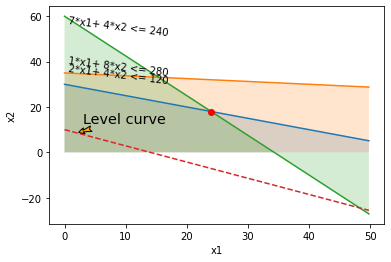

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from pulp import *
import time

c = [-10, -14]
A = [[2, 4], [1, 8], [7, 4]]
b = [120, 280, 240]

x0_bounds = (0, None)
x1_bounds = (0, None)
startTime = time.time()
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
stopTime = time.time()

def f(b, a1, a2, x):
    y = np.array([])
    for xIter in x:
        yIter = (b-a1*xIter)/a2
        y = np.append(y, yIter)
    return y

x = np.arange(0, 50, 0.2)
for i in range(len(A)):
    y = f(b=b[i], a1=A[i][0], x=x, a2=A[i][1])
    plt.plot(x, y)
    plt.fill_between(x, y, alpha=0.2)
    plt.text(0.5, f(b=b[i], a1=A[i][0], x=[i+1,], a2=A[i][1])-2*i+1, 
             '{a1}*x1+ {a2}*x2 <= {b}'.format(a1=A[i][0], a2=A[i][1], b=b[i]), 
             rotation=-7%360)
plt.plot(x, (c[0]*c[1]-np.abs(c[0])*x)/np.abs(c[1]), '--')
plt.plot(res.x[0], res.x[1], 'ro')
plt.annotate('Level curve', 
             xy=(2, (c[0]*c[1]-np.abs(c[0])*2)/np.abs(c[1])), 
             xytext=(3, (c[0]*c[1]-np.abs(c[0])*3)/np.abs(c[1])+5), 
             size='x-large', arrowprops=dict(facecolor='orange', arrowstyle='fancy'))
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()